Linear Regression, Random Forest , KMeans ve PCA algoritmaları
ile veri analizi yapmak için gerekli kütüphaneler yüklenir.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

nutrition_labels.csv, csv uzantılı veri seti import edilir.

In [25]:
data = pd.read_csv('nutrition_labels.csv')

Veri setinin ilk beş satırı data.head() fonksiyonu ile görüntülenir.

In [27]:
data.head()

,Product Name,Calories,Body Type,Mood,Energy,Total Fat,Total Sugars,Carbohydrates (Carbs),Protein
0,Product 1,550,Fat,Neutral,Low,36.4g,37.1g,20.7g,46.1g
1,Product 2,517,Balanced,Neutral,Low,7.9g,0.1g,33.0g,4.0g
2,Product 3,432,Balanced,Neutral,Normal,11.0g,0.2g,8.3g,30.3g
3,Product 4,378,Fat,Sad,Low,9.0g,41.8g,6.7g,32.5g
4,Product 5,90,Slim,Neutral,Normal,12.7g,9.8g,5.5g,20.0g


Veri seti hakkında detaylı bilgi almak için data.info() fonksiyonu kullanılır.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Product Name           100000 non-null  object
 1   Calories               100000 non-null  int64 
 2   Body Type              100000 non-null  object
 3   Mood                   100000 non-null  object
 4   Energy                 100000 non-null  object
 5   Total Fat              100000 non-null  object
 6   Total Sugars           100000 non-null  object
 7   Carbohydrates (Carbs)  100000 non-null  object
 8   Protein                100000 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


Veri setinden null olan eksik değer de diyebeliceğemiz değerlerin varlığı data.isnull().sum() fonksiyonu ile kontrol edilir.

In [29]:
data.isnull().sum()

,0
Product Name,0
Calories,0
Body Type,0
Mood,0
Energy,0
Total Fat,0
Total Sugars,0
Carbohydrates (Carbs),0
Protein,0


Veri setinde eksik değerler varsa bu değerler sütun için hesaplanan median değerine göre doldurulur.

In [49]:
data_filled = data.fillna(data.median())

"Total Fat", "Total Sugars", "Carbohydrates (Carbs)" ve "Protein" sütunlarındaki değerlerden "g" karakteri kaldırılır ve ardından her bir sütundaki değerler float tipine dönüştürülür.

In [30]:
for column in ["Total Fat", "Total Sugars", "Carbohydrates (Carbs)", "Protein"]:
    data[column] = data[column].str.replace("g", "").astype(float)

"Product Name" sütunu veri setinden çıkarılır, ardından "Product ID" adında bir sütun eklenir ve bu sütun, her bir ürün için sırasıyla 1'den başlayarak numaralandırılır, son olarak "Product ID" sütunu başa alınarak veri seti yeniden düzenlenir.

In [31]:
data = data.drop("Product Name", axis=1)
data["Product ID"] = range(1, len(data) + 1)
data = data[["Product ID"] + [col for col in data.columns if col != "Product ID"]]
print("Yeni Veri Seti:")
print(data)

Yeni Veri Seti:
       Product ID  Calories Body Type     Mood        Energy  Total Fat  \
0               1       550       Fat  Neutral           Low       36.4   
1               2       517  Balanced  Neutral           Low        7.9   
2               3       432  Balanced  Neutral        Normal       11.0   
3               4       378       Fat      Sad           Low        9.0   
4               5        90      Slim  Neutral        Normal       12.7   
...           ...       ...       ...      ...           ...        ...   
99995       99996       422  Balanced  Neutral        Normal        1.6   
99996       99997       794  Balanced  Neutral        Normal        7.4   
99997       99998       564       Fat  Neutral  Energy Burst       38.5   
99998       99999        84  Balanced  Neutral           Low        5.2   
99999      100000       755  Balanced      Sad  Energy Burst       23.1   

       Total Sugars  Carbohydrates (Carbs)  Protein  
0              37.1          

Veri setindeki kategorik sütunlara One-Hot Encoding uygulanarak sayısal sütunlar haline getirilir, ardından boole (True/False) değerleri içeren sütunlar 1 ve 0 şeklinde dönüştürülür ve güncellenmiş veri seti görüntülenir.

In [32]:
data = pd.DataFrame(data)

# Kategorik sütunları seçme
categorical_columns = data.select_dtypes(include=['object']).columns

# One-Hot Encoding uygulama ve veri çerçevesini güncelleme
data = pd.get_dummies(data, columns=categorical_columns)

boolean_columns = data.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    data[column] = data[column].astype(int)

# Güncellenmiş veri setini görüntüleme
data.head()

,Product ID,Calories,Total Fat,Total Sugars,Carbohydrates (Carbs),Protein,Body Type_Balanced,Body Type_Fat,Body Type_Fit,Body Type_Slim,Mood_Happy,Mood_Neutral,Mood_Sad,Energy_Energy Burst,Energy_Low,Energy_Normal
0,1,550,36.4,37.1,20.7,46.1,0,1,0,0,0,1,0,0,1,0
1,2,517,7.9,0.1,33.0,4.0,1,0,0,0,0,1,0,0,1,0
2,3,432,11.0,0.2,8.3,30.3,1,0,0,0,0,1,0,0,0,1
3,4,378,9.0,41.8,6.7,32.5,0,1,0,0,0,0,1,0,1,0
4,5,90,12.7,9.8,5.5,20.0,0,0,0,1,0,1,0,0,0,1



"Mood_Happy" veya "Mood_Neutral" sütunlarında 1 olan değerleri temel alarak, "Mental_Health" adlı yeni bir sütun oluşturulur ve bu sütunda sağlıklı olma durumu 1, sağlıksız olma durumu ise 0 olarak belirlenir.

In [33]:
data = pd.DataFrame(data)

# Ruh sağlığı sütununu oluşturma
data["Mental_Health"] = ((data["Mood_Happy"] == 1) | (data["Mood_Neutral"] == 1)).astype(int)


"Mood_Happy", "Mood_Neutral" ve "Mood_Sad" sütunları veri setinden silinir ve güncellenmiş veri seti görüntülenir.

In [34]:
data = data.drop(columns=["Mood_Happy", "Mood_Neutral", "Mood_Sad"])
data.head()

,Product ID,Calories,Total Fat,Total Sugars,Carbohydrates (Carbs),Protein,Body Type_Balanced,Body Type_Fat,Body Type_Fit,Body Type_Slim,Energy_Energy Burst,Energy_Low,Energy_Normal,Mental_Health
0,1,550,36.4,37.1,20.7,46.1,0,1,0,0,0,1,0,1
1,2,517,7.9,0.1,33.0,4.0,1,0,0,0,0,1,0,1
2,3,432,11.0,0.2,8.3,30.3,1,0,0,0,0,0,1,1
3,4,378,9.0,41.8,6.7,32.5,0,1,0,0,0,1,0,0
4,5,90,12.7,9.8,5.5,20.0,0,0,0,1,0,0,1,1


Veri setindeki tüm sütunlar için histogramlar ve bir boxplot grafiği oluşturulur ve görselleştirilir.

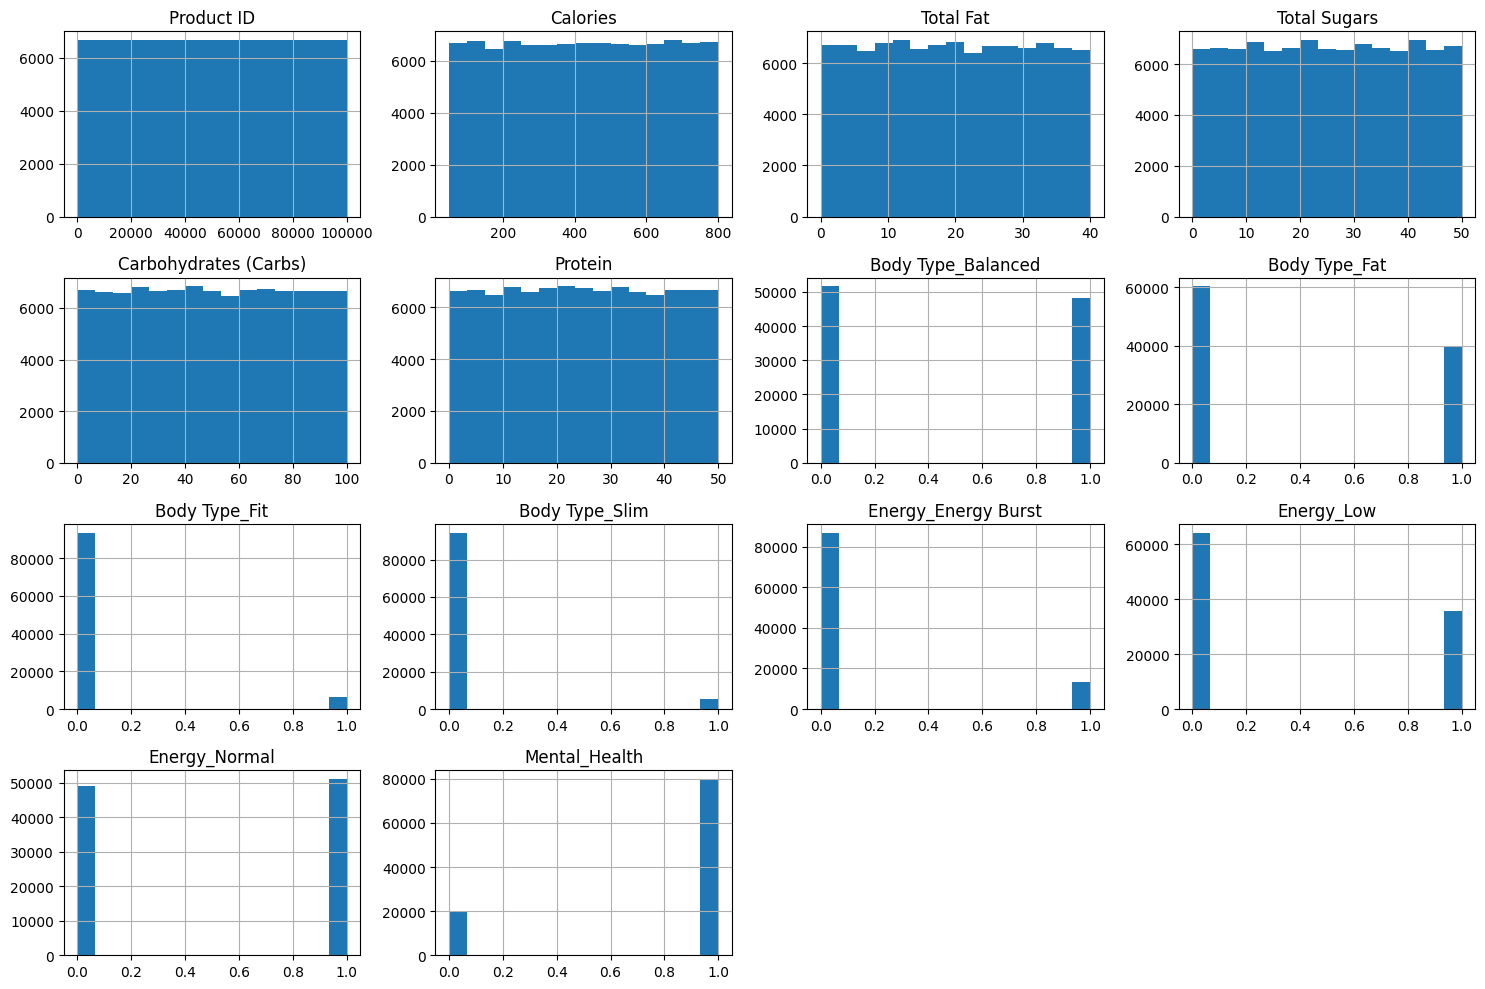

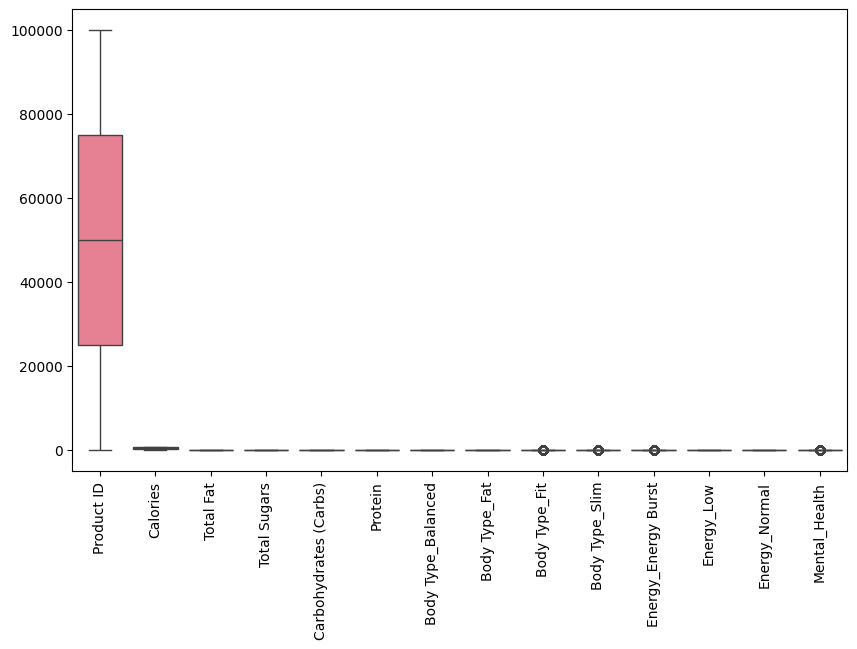

In [35]:
# Tüm sütunlar için histogramlar
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

Veri setindeki "Product ID" sütununu kalıcı olarak siler.

In [36]:
data.drop(columns=['Product ID'], inplace=True)

"Mental_Health" sütunundaki sınıfların (0 ve 1) oranları hesaplanarak, her sınıfın veri setindeki yüzdesel dağılımını yazdırılır.

In [37]:
class_distribution = data['Mental_Health'].value_counts(normalize=True)
print("Ruh sağlığı oranları: ")
print(class_distribution)

Ruh sağlığı oranları: 
Mental_Health
1    0.79972
0    0.20028
Name: proportion, dtype: float64


"Mental_Health" sütunundaki sınıfların (0 ve 1) sayısını gösteren bir çubuk grafiği oluşturulur.

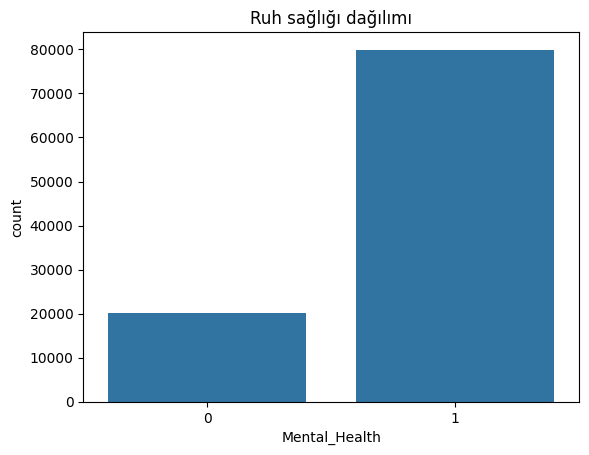

In [38]:
sns.countplot(x='Mental_Health', data=data)
plt.title("Ruh sağlığı dağılımı")
plt.show()

 "Mental_Health" sütunu dışında kalan tüm sütunları bağımsız değişkenler (X), "Mental_Health" sütununu ise bağımlı değişken (y) olarak ayrılır ve SMOTE yöntemiyle dengesiz sınıf dağılımını düzeltmek için oversampling yaparak yeni sınıf dağılımını kontrol edilir.

In [39]:
# Bağımsız ve bağımlı değişkenleri ayır
X = data.drop('Mental_Health', axis=1)
y = data['Mental_Health']

# SMOTE ile oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeni sınıf dağılımını kontrol et
print("Yeni Ruh Sağlığı Dağılımı:")
print(y_resampled.value_counts())

Yeni Ruh Sağlığı Dağılımı:
Mental_Health
1    79972
0    79972
Name: count, dtype: int64


Veri setindeki sayısal sütunlar arasındaki korelasyonlar hesaplanır ve sonuçları, annotasyonlu ve renkli bir ısı haritası (heatmap) şeklinde görselleştirilir.

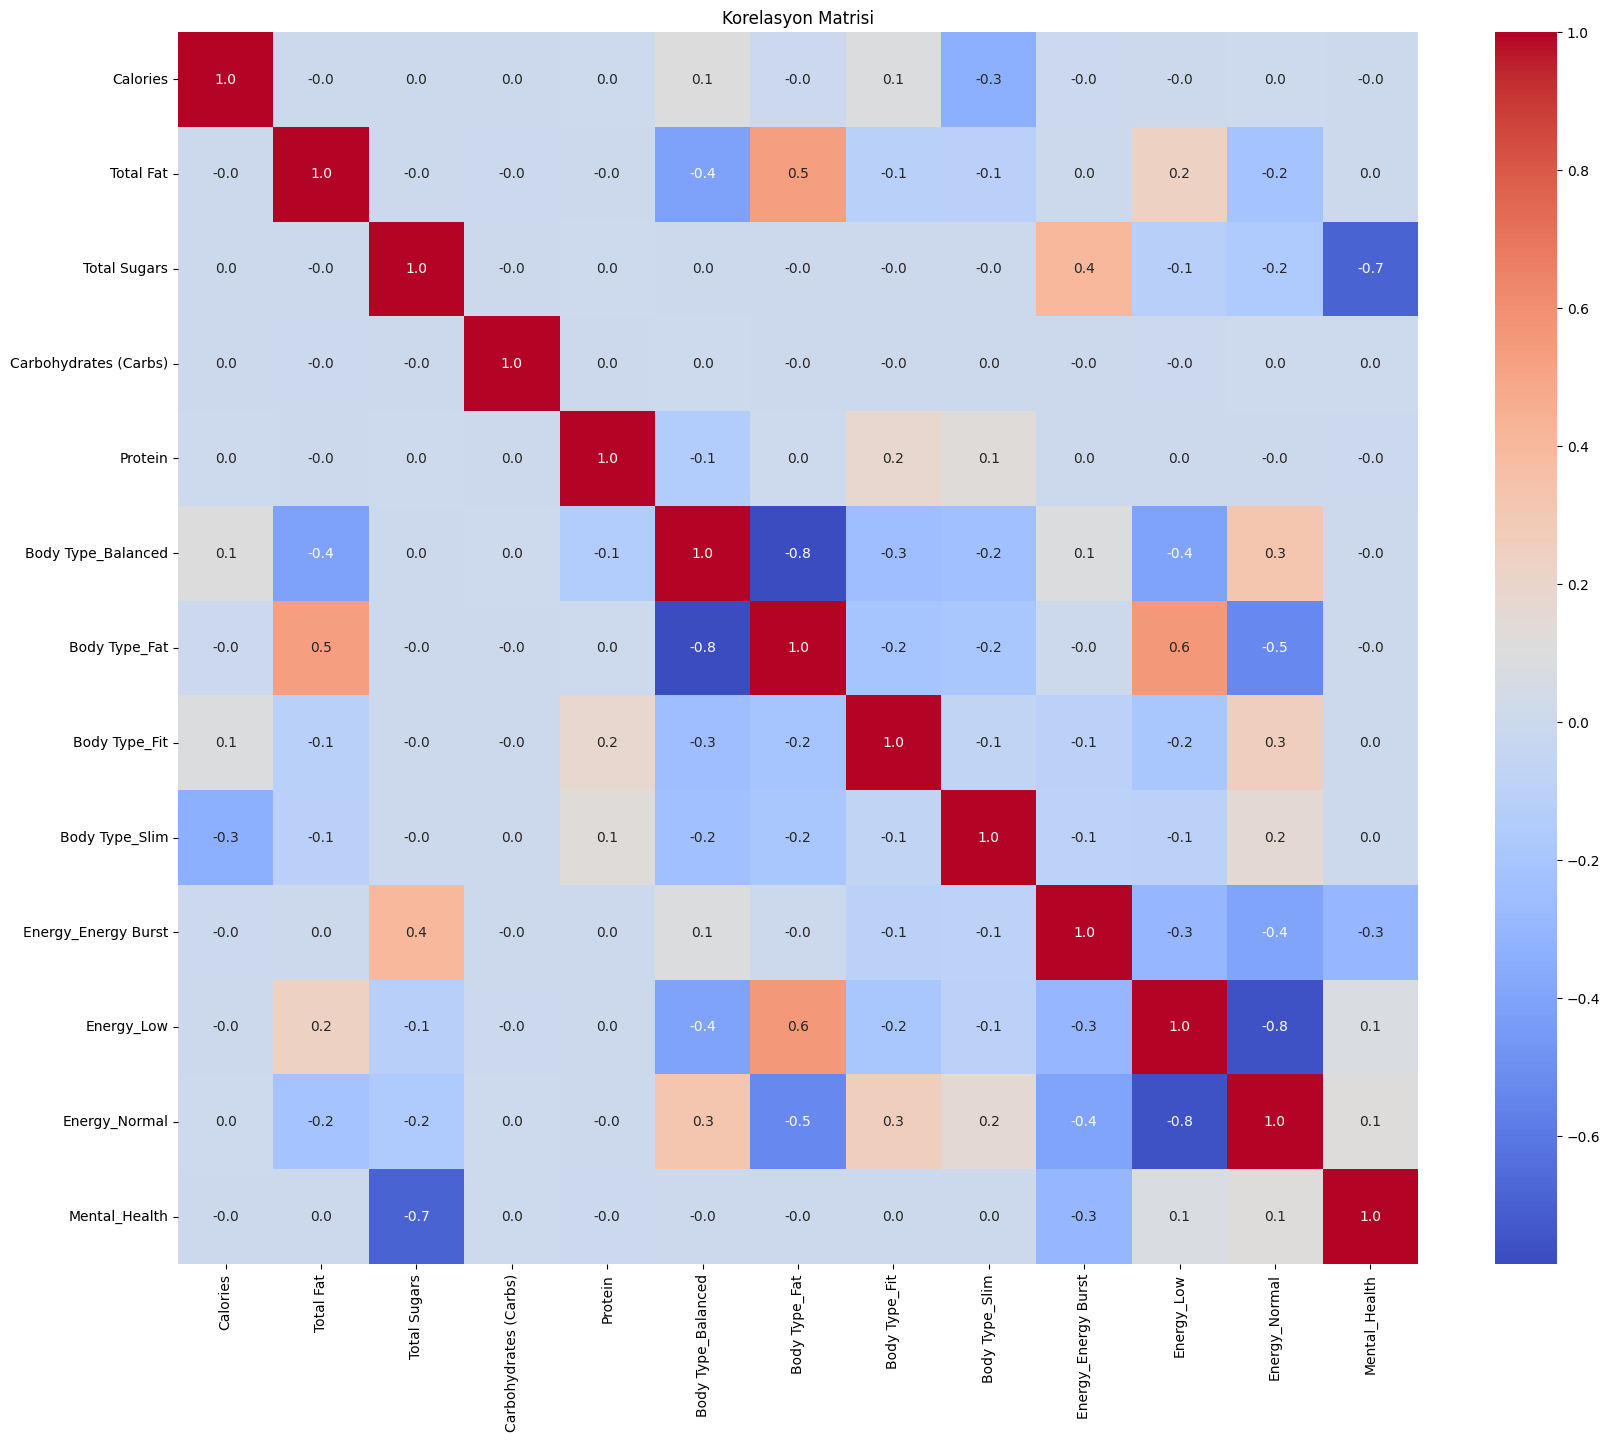

In [40]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

Bağımlı (y) ve bağımsız (X) değişkenleri ayrılır ve ardından veri eğitim ve test setlerine, %30 test ve %70 eğitim oranında, rastgele bölmek için train_test_split fonksiyonu kullanılır.

In [41]:
# Bağımlı ve bağımsız değişkenlerin ayrılması
X = data.drop(columns=["Mental_Health"])
y = data["Mental_Health"]

# Eğitim ve test setine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest modeli eğitilir, test verisi üzerinde tahmin yapılır ve ardından modelin performansı, doğru ve yanlış sınıflandırmalar hakkında detaylı bilgi veren bir sınıflandırma raporu ile değerlendirilir.

In [42]:
# Random Forest Modeli
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Performans Değerlendirmesi
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5940
           1       1.00      1.00      1.00     24060

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



 Linear Regression modeli eğitilir, test verisi üzerinde tahmin yapılır ve modelin performansı, ortalama kare hata (MSE) ve R-kare (R²) değeri ile değerlendirilir.

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Linear Regression
Mean Squared Error: 0.08293673858241632
R-squared: 0.47771519066968726


K-means kümeleme algoritması için 10 ile 19 arasında farklı küme sayılarıyla Inertia (Hata Kareleri Toplamı) ve Silhouette Score değerleri hesaplanır ve bu değerlerin görselleştirilmiş grafikleri çizilir.

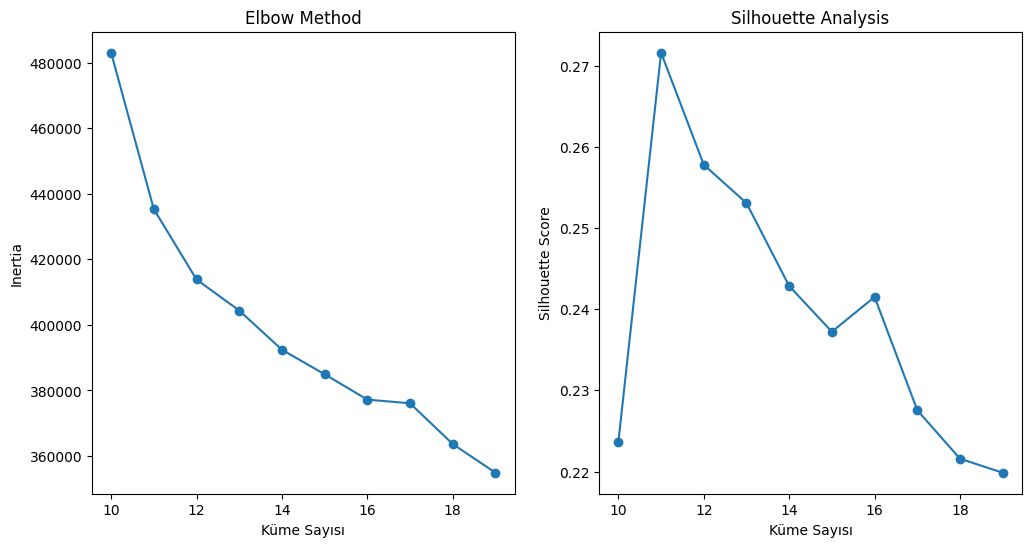

In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertias = []
silhouettes = []
for k in range(10, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled_data, kmeans.labels_))

# Grafikleri çizdirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(10, 20), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(10, 20), silhouettes, marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Küme Sayısı")
plt.ylabel("Silhouette Score")
plt.show()


K-means kümeleme algoritması için 21 ile 30 arasında farklı küme sayılarıyla Inertia (Hata Kareleri Toplamı) ve Silhouette Score değerleri hesaplanır ve bu değerlerin görselleştirilmiş grafikleri çizilir.

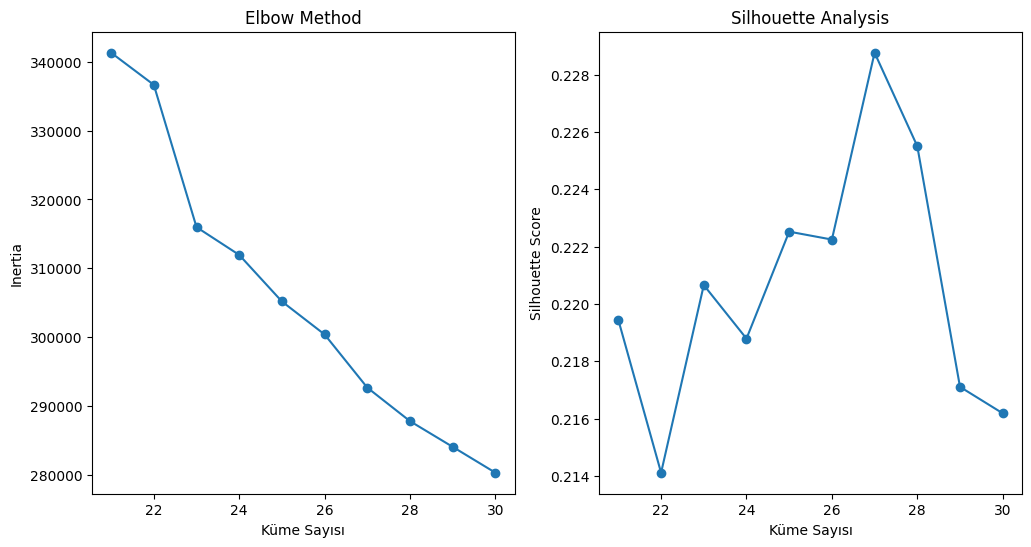

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertias = []
silhouettes = []
for k in range(21, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled_data, kmeans.labels_))

# Grafikleri çizdirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(21, 31), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(21, 31), silhouettes, marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Küme Sayısı")
plt.ylabel("Silhouette Score")
plt.show()

K-means kümeleme algoritması için 40 ile 79 arasında farklı küme sayılarıyla Inertia (Hata Kareleri Toplamı) ve Silhouette Score değerleri hesaplanır ve bu değerlerin görselleştirilmiş grafikleri çizilir.

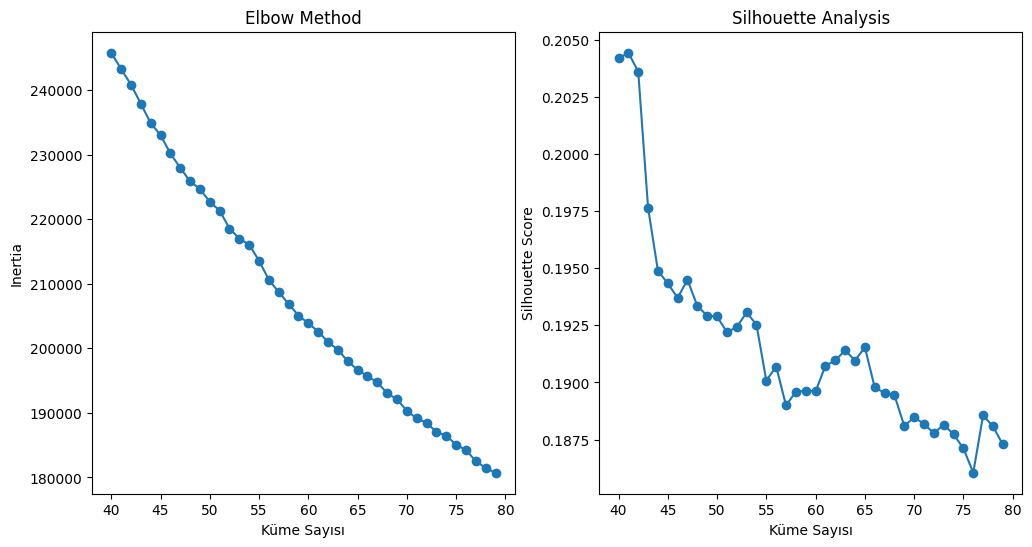

In [47]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertias = []
silhouettes = []
for k in range(40, 80):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled_data, kmeans.labels_))

# Grafikleri çizdirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(40, 80), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(40, 80), silhouettes, marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Küme Sayısı")
plt.ylabel("Silhouette Score")
plt.show()

Veri ölçeklendirilip K-Means kümeleme algoritması ile 11 kümeye ayrılarak kümelere atanan etiketler veri setine eklenir ve küme performansı Inertia (Hata Kareleri Toplamı) ve Silhouette Score ile değerlendirilir.

In [48]:
# Veri ön işleme (ölçekleme)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-Means modelini eğitme
kmeans = KMeans(n_clusters=11, random_state=42)  # Küme sayısı: 11
kmeans.fit(scaled_data)

# Kümelere atanan etiketler
data["Cluster"] = kmeans.labels_

#  Performans analizi
# a) Inertia (toplam hata kareleri toplamı)
inertia = kmeans.inertia_

# b) Silhouette Score (kümelerin ayırt edilebilirliği)
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)

# Sonuçları görüntüleme
print("Kümeleme Sonuçları:")
print(data)
print("\nPerformans Analizi:")
print(f"Inertia (Hata Kareleri Toplamı): {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

Kümeleme Sonuçları:
       Calories  Total Fat  Total Sugars  Carbohydrates (Carbs)  Protein  \
0           550       36.4          37.1                   20.7     46.1   
1           517        7.9           0.1                   33.0      4.0   
2           432       11.0           0.2                    8.3     30.3   
3           378        9.0          41.8                    6.7     32.5   
4            90       12.7           9.8                    5.5     20.0   
...         ...        ...           ...                    ...      ...   
99995       422        1.6          33.1                   92.9      7.8   
99996       794        7.4           6.6                    4.4      2.9   
99997       564       38.5          32.9                   59.8     25.2   
99998        84        5.2          26.4                   51.4     21.3   
99999       755       23.1          41.6                   35.2     17.5   

       Body Type_Balanced  Body Type_Fat  Body Type_Fit  Body Type_

Veri ölçeklendirilip PCA (Principal Component Analysis) ile temel bileşenlere ayrılarak açıklanan varyans oranı görselleştirilir, %95 varyansı açıklayan bileşen sayısı belirlenir ve ardından düşük boyutlu veri görselleştirilir.

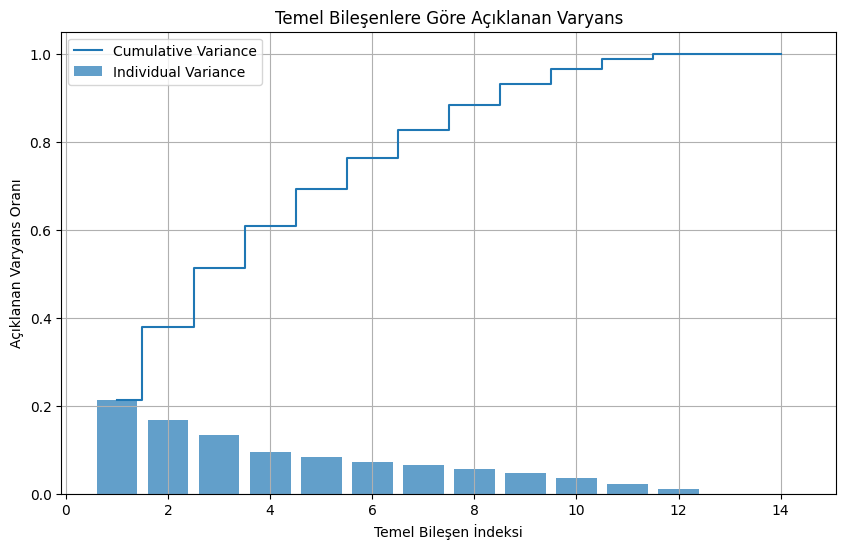

%95 varyansı açıklamak için gerekli bileşen sayısı: 10


<ipython-input-50-0d5a71785794>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, cmap='viridis')


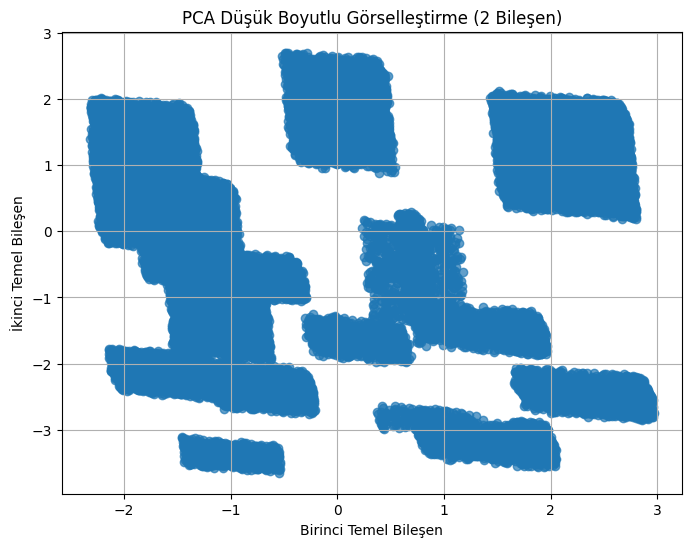

In [50]:
#  Veriyi Ölçeklendirme (Standartlaştırma)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#  PCA Algoritmasını Uygulama
pca = PCA(n_components=None)  # Tüm bileşenleri çıkar
pca_data = pca.fit_transform(scaled_data)

#  Performans Analizi - Açıklanan Varyans Oranı
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#  Açıklanan Varyans Oranını Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Variance')
plt.xlabel('Temel Bileşen İndeksi')
plt.ylabel('Açıklanan Varyans Oranı')
plt.title('Temel Bileşenlere Göre Açıklanan Varyans')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#  En Önemli Bileşenleri Belirleme
# Örneğin, %95 açıklanan varyansa ulaşmak için gereken bileşen sayısı
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"%95 varyansı açıklamak için gerekli bileşen sayısı: {n_components_95}")

#  PCA ile Düşük Boyutlu Veriyi Elde Etme
# %95 varyansı açıklayan bileşenlerle yeniden PCA uygula
pca_optimized = PCA(n_components=n_components_95)
reduced_data = pca_optimized.fit_transform(scaled_data)

#  Sonuçları Görselleştirme (2D Örneği)
if n_components_95 >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, cmap='viridis')
    plt.title('PCA Düşük Boyutlu Görselleştirme (2 Bileşen)')
    plt.xlabel('Birinci Temel Bileşen')
    plt.ylabel('İkinci Temel Bileşen')
    plt.grid(True)
    plt.show()

PCA algoritması ile düşük boyuta gelen veri orijinal boyutuna yapılandırılarak yeniden yapılandırma hatası (Mean Squared Error) hesaplanır ve PCA'nın veri kaybı ile ilişkisi değerlendirilir.

In [51]:
# Orijinal boyuta yeniden yapılandırma
reconstructed_data = pca_optimized.inverse_transform(reduced_data)

# Yeniden yapılandırma hatası (Mean Squared Error)
reconstruction_error = np.mean((scaled_data - reconstructed_data) ** 2)
print(f"Yeniden Yapılandırma Hatası: {reconstruction_error:.4f}")


Yeniden Yapılandırma Hatası: 0.0335



PCA ile düşük boyutlu hale getirilmiş veri kullanılarak K-Means kümeleme algoritması uygulanır ve ardından Silhouette Score hesaplanarak kümeleme sonuçlarının doğruluğu değerlendirilir.

In [55]:
# Kümeleme
kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(reduced_data)
labels = kmeans.labels_

# Silhouette Score hesaplama
silhouette_avg = silhouette_score(reduced_data, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.24
